# CS771A Assignment 4
\- Yash Gupta (190997)

Use any additional libraries you want, but if you don't explicitly code stuff that I have explicitly asked you to code, you will not get marks.

### Q1. Kernel k-means

Let's try and end our course on a happy note. The smiley dataset you see below is made up of many clusters of points. 

In [239]:
import numpy as np
import numpy.linalg as lin
import numpy.random as rnd
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal


def getFigure( sizex = 7, sizey = 7 ):
    fig = plt.figure( figsize = (sizex, sizey) )
    return fig

def plot2D( X, fig, color = 'r', marker = '+', size = 100, empty = False ):
    plt.figure( fig.number )
    if empty:
        plt.scatter( X[:,0], X[:,1], s = size, facecolors = 'none', edgecolors = color, marker = marker  )
    else:
        plt.scatter( X[:,0], X[:,1], s = size, c = color, marker = marker )


def genCrescentData( d, n, mu, r, flipped = False ):
    X = np.vstack( (np.cos( np.linspace( 0, np.pi, n ) ), np.sin( np.linspace( 0, np.pi, n ) ) ) ).T
    if flipped:
        X[:,1] = -np.abs( X[:,1] )
    else:
        X[:,1] = np.abs( X[:,1] )
    X = (X * r) + mu
    return X

def genSphericalData( d, n, mu, r ):
    X = rnd.normal( 0, 1, (n, d) )
    norms = lin.norm( X, axis = 1 )
    X = X / norms[:, np.newaxis]
    X = (X * r) + mu
    return X

In [3]:
d = 2
n = 200

mu1 = np.array( [0,0] )
mu2 = np.array( [0,1] )
mu3 = np.array( [0,0] )
mu4 = np.array( [-3,5] )
mu5 = np.array( [3,5] )

tmp1 = genCrescentData( d, n, mu1, 1 )
tmp2 = genCrescentData( d, n, mu2, 5, flipped = True )
tmp3 = genSphericalData( d, n, mu3, 10 )
tmp4 = genSphericalData( d, n, mu4, 1 )
tmp5 = genSphericalData( d, n, mu5, 1 )
X = np.vstack( (tmp1, tmp2, tmp3, tmp4, tmp5) )

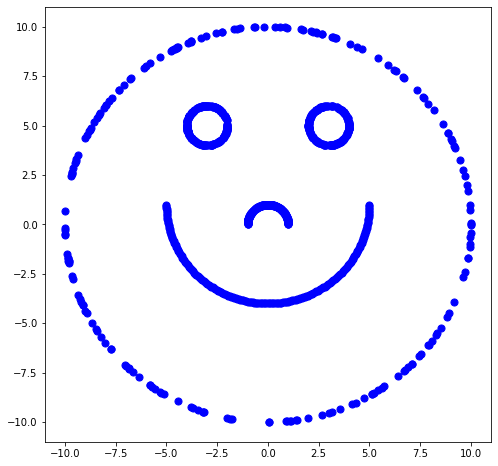

In [4]:
fig = getFigure( 8, 8 )
plot2D( X, fig, size = 50, color = 'b', marker = 'o' )

(a) Can you implement the k-means algorithm to cluster this dataset? Visualize your output. [10 points] 

In [50]:
def kmeans(X, K=4, max_iter=100000):
    N = X.shape[0]
    dim = X.shape[1]
    z = np.zeros(N)
    mu = rnd.rand(K, dim)
    t = 0
    while t < max_iter:
        mu_old = mu
        for n in range(N):
            min_dist = np.inf
            for k in range(K):
                dist = lin.norm(X[n] - mu[k], 2)
                if dist < min_dist:
                    z[n] = k
                    min_dist = dist
        
        for k in range(K):
            sum = np.zeros(dim)
            num = 0
            for n in range(N):
                if z[n] == k:
                    num += 1
                    sum += X[n]
            mu[k] = sum / num if num else mu_old[k]
        
        if (mu_old == mu).sum() == K * dim:
            break
        t += 1
    return z, mu

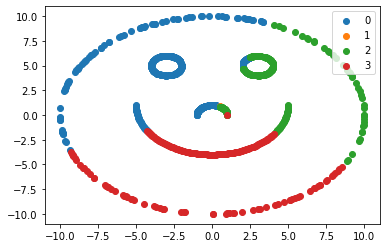

In [52]:
K = 4
z, mu = kmeans(X, K)
for k in range(K):
    plt.scatter(X[z == k, 0], X[z == k, 1], label=k)
plt.legend()
plt.show()

(b) Implement k-means++ to initialize cluster centers usefully. [5 points]

In [120]:
def init_means(X, K):
    N = X.shape[0]
    dim = X.shape[1]
    selected = np.zeros(N)
    mu = rnd.rand(K, dim)
    idx = rnd.randint(N)
    mu[0] = X[idx]
    selected[idx] = 1
    for k in range(1, K):
        D = np.full(N, np.inf)
        D[selected == 1] = 0
        for n in range(N):
            if not selected[n]:
                for i in range(k):
                    dist = lin.norm(X[n] - mu[i], 2)
                    D[n] = min(D[n], dist)
        p = D ** 2
        p /= p.sum()
        idx = rnd.choice(N, p=p)
        mu[k] = X[idx]
        selected[idx] = 1
    return mu

def kmeans_plusplus(X, K=4, max_iter=100000):
    N = X.shape[0]
    dim = X.shape[1]
    z = np.zeros(N)
    mu = init_means(X, K)
    t = 0
    while t < max_iter:
        mu_old = mu
        for n in range(N):
            min_dist = np.inf
            for k in range(K):
                dist = lin.norm(X[n] - mu[k], 2)
                if dist < min_dist:
                    z[n] = k
                    min_dist = dist
        
        for k in range(K):
            sum = np.zeros(dim)
            num = 0
            for n in range(N):
                if z[n] == k:
                    num += 1
                    sum += X[n]
            mu[k] = sum / num if num else mu_old[k]
        
        if (mu_old == mu).sum() == K * dim:
            break
        t += 1
    return z, mu

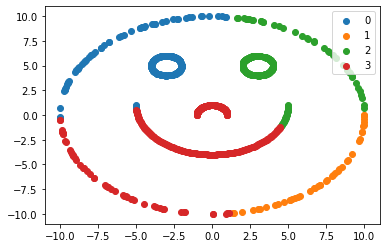

In [84]:
K = 4
z, mu = kmeans_plusplus(X, K)
for k in range(K):
    plt.scatter(X[z == k, 0], X[z == k, 1], label=k)
plt.legend()
plt.show()

(c) What value of k gives you the best clustering? Are you happy with the quality of the clustering? [5 points]

In [124]:
def kmeans_loss(X, z, mu):
    N = X.shape[0]
    loss = 0
    for n in range(N):
        loss += lin.norm(X[n] - mu[int(z[n])]) ** 2
    return loss

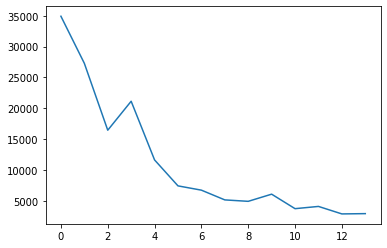

In [142]:
losses = []
for k in range(1, 15):
    z, mu = kmeans_plusplus(X, k)
    loss = kmeans_loss(X, z, mu)
    losses.append(loss)
plt.plot(losses)
plt.show()

We can see elbow around k=5.

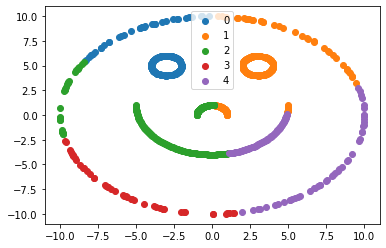

In [143]:
K = 5
z, mu = kmeans_plusplus(X, K)
for k in range(K):
    plt.scatter(X[z == k, 0], X[z == k, 1], label=k)
plt.legend()
plt.show()

(d) I'm going to say that we want to be able to do better than this. So I want you to kernelize your k-means algorithm with a Gaussian kernel. Visualize the clustering output of your kernel k-means algorithm [15 points]

In [196]:
def gaussian_kernel(x, z, gamma=1):
    dist = lin.norm(x - z, 2)
    exp = -gamma * dist ** 2
    kernel = np.exp(exp)
    return kernel

def kernel_dist_sq(x, z, gamma=1):
    return gaussian_kernel(x, x, gamma) + gaussian_kernel(z, z, gamma) - 2 * gaussian_kernel(x, z, gamma)

Kernelized k-means++:

In [197]:
def init_means_kernel(X, K):
    N = X.shape[0]
    dim = X.shape[1]
    selected = np.zeros(N)
    mu = rnd.rand(K, dim)
    idx = rnd.randint(N)
    mu[0] = X[idx]
    selected[idx] = 1
    for k in range(1, K):
        D = np.full(N, np.inf)
        D[selected == 1] = 0
        for n in range(N):
            if not selected[n]:
                for i in range(k):
                    dist = kernel_dist_sq(X[n], mu[i])
                    D[n] = min(D[n], dist)
        D /= D.sum()
        idx = rnd.choice(N, p=D)
        mu[k] = X[idx]
        selected[idx] = 1
    return mu

def kmeans_plusplus_kernel(X, K=4, max_iter=100000):
    N = X.shape[0]
    dim = X.shape[1]
    z = np.zeros(N)
    mu = init_means_kernel(X, K)
    t = 0
    while t < max_iter:
        mu_old = mu
        for n in range(N):
            min_dist = np.inf
            for k in range(K):
                dist = kernel_dist_sq(X[n], mu[k])
                if dist < min_dist:
                    z[n] = k
                    min_dist = dist
        
        for k in range(K):
            sum = np.zeros(dim)
            num = 0
            for n in range(N):
                if z[n] == k:
                    num += 1
                    sum += X[n]
            mu[k] = sum / num if num else mu_old[k]
        
        if (mu_old == mu).sum() == K * dim:
            break
        t += 1
    return z, mu

Kernelized k-means:

In [203]:
def kmeans_kernel(X, K=4, max_iter=100000):
    N = X.shape[0]
    dim = X.shape[1]
    z = np.zeros(N)
    mu = rnd.rand(K, dim)
    t = 0
    while t < max_iter:
        mu_old = mu
        for n in range(N):
            min_dist = np.inf
            for k in range(K):
                dist = kernel_dist_sq(X[n], mu[k])
                if dist < min_dist:
                    z[n] = k
                    min_dist = dist
        
        for k in range(K):
            sum = np.zeros(dim)
            num = 0
            for n in range(N):
                if z[n] == k:
                    num += 1
                    sum += X[n]
            mu[k] = sum / num if num else mu_old[k]
        
        if (mu_old == mu).sum() == K * dim:
            break
        t += 1
    return z, mu

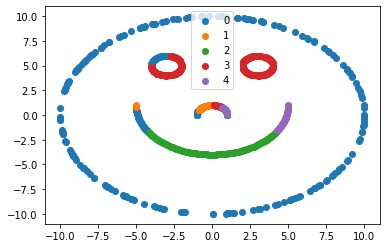

In [204]:
K = 5
z, mu = kmeans_kernel(X, K)
for k in range(K):
    plt.scatter(X[z == k, 0], X[z == k, 1], label=k)
plt.legend()
plt.show()

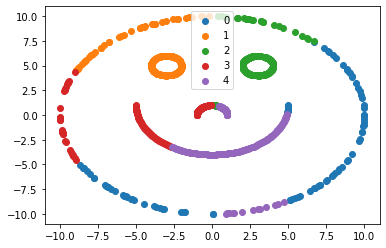

In [200]:
K = 5
z, mu = kmeans_plusplus_kernel(X, K)
for k in range(K):
    plt.scatter(X[z == k, 0], X[z == k, 1], label=k)
plt.legend()
plt.show()

In [201]:
def kmeans_loss_kernel(X, z, mu):
    N = X.shape[0]
    loss = 0
    for n in range(N):
        loss += kernel_dist_sq(X[n], mu[int(z[n])])
    return loss

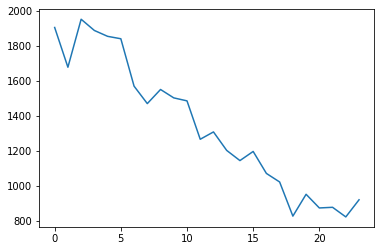

In [202]:
losses = []
for k in range(1, 25):
    z, mu = kmeans_plusplus_kernel(X, k)
    loss = kmeans_loss_kernel(X, z, mu)
    losses.append(loss)
plt.plot(losses)
plt.show()

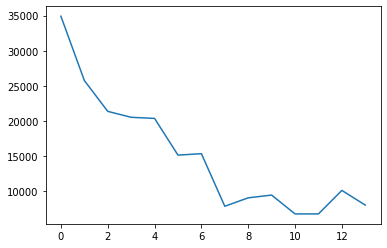

In [206]:
losses = []
for k in range(1, 15):
    z, mu = kmeans_plusplus_kernel(X, k)
    loss = kmeans_loss(X, z, mu)
    losses.append(loss)
plt.plot(losses)
plt.show()

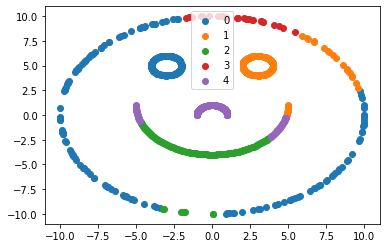

In [205]:
K = 5
z, mu = kmeans_plusplus_kernel(X, K)
for k in range(K):
    plt.scatter(X[z == k, 0], X[z == k, 1], label=k)
plt.legend()
plt.show()

### Q2. Expectation-Maximization

We saw how to use EM to learn parameters for Gaussian mixture models last week. Specifically, for a GMM described by the set of parameters $\{\pi_k, \mu_k, \Sigma_k \}_{k=1}^K$, we saw that the E-step boils down to figuring out the expected assignment of clusters based on a responsibility judgment proportional to $\pi_k~N(\mu_k, \Sigma_k)$, given curent parameter estimates, followed by using GDA MLE updates assuming the current expected assignment in the M-step to update parameter values.

(a) Can you derive the E-step and M-step for an EM algorithm that would work for a Gaussian mixture model wherein the mixture weights $\pi_k$ are known, and the covariances are restricted to be spherical, i.e. $\Sigma_k = \sigma^2_k I$? [20 points]

The mixture weights $\pi_k$ are known and the covariances are restricted to be spherical i.e. $\Sigma_k = \sigma^2_k I$. So we need to update the value of $\sigma^2_k$ instead of $\Sigma_k$ and the value of $\pi_k$ will not change. 

The change in the value of $\sigma^2_k$ will be the same as the MLE solution of GDA with known $\pi_k$ and unknown $\sigma^2_k$ and $\mu_k$. The MLE solution for the value of $\mu_k$ will remain the same. 

As given in the slides ([link](https://towardsdatascience.com/gaussian-discriminant-analysis-an-example-of-generative-learning-algorithms-2e336ba7aa5c)), the log-likelihood for the GDA is:
$$ LL = \sum_{i = 1}^m \left( - \frac{n}{2} \log 2 \pi - \frac{1}{2} \log |\Sigma| - \frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) + y \log \phi + (1 - y) \log (1 - \phi) \right) $$

Putting $\Sigma = \sigma^2_k I$,
$$ LL = \sum_{i = 1}^m \left( - \frac{n}{2} \log 2 \pi - \frac{1}{2} \log \sigma^{2D} |I| - \frac{1}{2 \sigma^2} (x - \mu)^T I (x - \mu) + y \log \phi + (1 - y) \log (1 - \phi) \right) $$
where $\Sigma$ is a $D \times D$ matrix.

Now, lets take the derivative of $LL$ wrt $\sigma^2$ and make it equal to 0. 
$$ \frac{\partial LL}{\partial \sigma^2} = \sum_{i = 1}^m \left( - \frac{D}{2 \sigma^2} + \frac{1}{2 \sigma^4} (x - \mu)^T (x - \mu) \right) = 0 $$
$$ \implies \sum_{i = 1}^m \left( - D + \frac{1}{\sigma^2} (x - \mu)^T (x - \mu) \right) = 0 $$
$$ \implies \sum_{i = 1}^m \frac{1}{\sigma^2} (x - \mu)^T (x - \mu) = D m $$
$$ \implies \sigma^2 = \frac{1}{D m} \sum_{i = 1}^m (x - \mu)^T (x - \mu) $$

which is the same as
$$ \sigma_k^2 = \frac{1}{D N_k} \sum_{n = 1}^N \gamma_{nk} (x_n - \mu_k)^T (x_n - \mu_k) $$

So, the E-step would be the same as the one for the standard GMM but in the M step, update in the value of $\pi_k$ and $\Sigma_k$ will not take place, $\mu_k$ would change as in the standard GMM and $\sigma_k^2$ will change according to the following rule:
$$ (\sigma_k^2)^{(t)} = \frac{1}{D N_k} \sum_{n = 1}^N \gamma_{nk}^{(t)} (x_n - \mu_k^{(t)})^T (x_n - \mu_k^{(t)}) $$

(b) Implement this algorithm and show that it works on synthetic data with 3 clusters. If you are unable to derive the EM algorithm for part (a), implement the EM algorithm I showed in the class slides for the standard GMM (5 point penalty for taking this option) [15 points]. 

In [ ]:
def log_sum_exp(Z):
    """ Compute log(\sum_i exp(Z_i)) for some array Z."""
    return np.max(Z) + np.log(np.sum(np.exp(Z - np.max(Z))))

def loglikelihood(data, weights, means, covs):
    """ Compute the loglikelihood of the data for a Gaussian mixture model with the given parameters. """
    num_clusters = len(means)
    num_dim = len(data[0])
    
    ll = 0
    for d in data:
        
        Z = np.zeros(num_clusters)
        for k in range(num_clusters):
            
            # Compute (x-mu)^T * Sigma^{-1} * (x-mu)
            delta = np.array(d) - means[k]
            exponent_term = np.dot(delta.T, np.dot(np.linalg.inv(covs[k]), delta))
            
            # Compute loglikelihood contribution for this data point and this cluster
            Z[k] += np.log(weights[k])
            Z[k] -= 1/2. * (num_dim * np.log(2*np.pi) + np.log(np.linalg.det(covs[k])) + exponent_term)
            
        # Increment loglikelihood contribution of this data point across all clusters
        ll += log_sum_exp(Z)
        
    return ll

In [ ]:
def compute_responsibilities(data, weights, means, covariances):
    '''E-step: compute responsibilities, given the current parameters'''
    num_data = len(data)
    num_clusters = len(means)
    resp = np.zeros((num_data, num_clusters))
    
    # Update resp matrix so that resp[i,k] is the responsibility of cluster k for data point i.
    # Hint: To compute likelihood of seeing data point i given cluster k, use multivariate_normal.pdf.
    for i in range(num_data):
        for k in range(num_clusters):
            
            resp[i, k] = weights[k]*multivariate_normal.pdf(data[i], mean=means[k], cov=covariances[k])
    
    # Add up responsibilities over each data point and normalize
    row_sums = resp.sum(axis=1)[:, np.newaxis]
    resp = resp / row_sums
    
    return resp

In [ ]:
def compute_soft_counts(resp):
    # Compute the total responsibility assigned to each cluster, which will be useful when 
    # implementing M-steps below. In the lectures this is called N^{soft}
    counts = np.sum(resp, axis=0)
    return counts

In [ ]:
def compute_weights(counts):
    num_clusters = len(counts)
    weights = [0.] * num_clusters
    
    for k in range(num_clusters):
        # Update the weight for cluster k using the M-step update rule for the cluster weight, \hat{\pi}_k.
        # HINT: compute # of data points by summing soft counts.
        weights[k] = counts[k] / np.sum(counts)

    return weights

In [ ]:
def compute_means(data, resp, counts):
    num_clusters = len(counts)
    num_data = len(data)
    means = [np.zeros(len(data[0]))] * num_clusters
    
    for k in range(num_clusters):
        # Update means for cluster k using the M-step update rule for the mean variables.
        # This will assign the variable means[k] to be our estimate for \hat{\mu}_k.
        weighted_sum = 0.
        for i in range(num_data):
            
            weighted_sum += data[i] * resp[i][k]
        
        means[k] = weighted_sum / counts[k]

    return means

In [ ]:
def compute_covariances(data, resp, counts, means):
    num_clusters = len(counts)
    num_dim = len(data[0])
    num_data = len(data)
    covariances = [np.zeros((num_dim,num_dim))] * num_clusters
    
    for k in range(num_clusters):
        # Update covariances for cluster k using the M-step update rule for covariance variables.
        # This will assign the variable covariances[k] to be the estimate for \hat{\Sigma}_k.
        weighted_sum = np.zeros((num_dim, num_dim))
        for i in range(num_data):
            
            weighted_sum += resp[i][k]*np.outer(data[i] - means[k], data[i] - means[k])
        
        covariances[k] = weighted_sum / counts[k]

    return covariances

In [ ]:
def EM(data, init_means, init_covariances, init_weights, maxiter=1000, thresh=1e-4):
    
    # Make copies of initial parameters, which we will update during each iteration
    means = init_means[:]
    covariances = init_covariances[:]
    weights = init_weights[:]
    
    # Infer dimensions of dataset and the number of clusters
    num_data = len(data)
    num_dim = len(data[0])
    num_clusters = len(means)
    
    # Initialize some useful variables
    resp = np.zeros((num_data, num_clusters))
    ll = loglikelihood(data, weights, means, covariances)
    ll_trace = [ll]
    
    for it in range(maxiter):
        if it % 5 == 0:
            print("Iteration %s" % it)
        
        # E-step: compute responsibilities
        resp = compute_responsibilities(data, weights, means, covariances)

        # M-step
        # Compute the total responsibility assigned to each cluster, which will be useful when 
        # implementing M-steps below. In the lectures this is called N^{soft}
        counts = compute_soft_counts(resp)
        
        # Update the weight for cluster k using the M-step update rule for the cluster weight, \hat{\pi}_k.
        
        weights = compute_weights(counts)
        
        # Update means for cluster k using the M-step update rule for the mean variables.
        # This will assign the variable means[k] to be our estimate for \hat{\mu}_k.
        
        means = compute_means(data, resp, counts)
        
        # Update covariances for cluster k using the M-step update rule for covariance variables.
        # This will assign the variable covariances[k] to be the estimate for \hat{\Sigma}_k.
        
        covariances = compute_covariances(data, resp, counts, means)
        
        # Compute the loglikelihood at this iteration
        
        ll_latest = loglikelihood(data, weights, means, covariances)
        ll_trace.append(ll_latest)
        
        # Check for convergence in log-likelihood and store
        if (ll_latest - ll) < thresh and ll_latest > -np.inf:
            break
        ll = ll_latest
    
    if it % 5 != 0:
        print("Iteration %s" % it)
    
    out = {'weights': weights, 'means': means, 'covs': covariances, 'loglik': ll_trace, 'resp': resp}

    return out

In [ ]:
def generate_MoG_data(num_data, means, covariances, weights):
    """ Creates a list of data points """
    num_clusters = len(weights)
    data = []
    for i in range(num_data):
        #  Use np.random.choice and weights to pick a cluster id greater than or equal to 0 and less than num_clusters.
        k = np.random.choice(len(weights), 1, p=weights)[0]

        # Use np.random.multivariate_normal to create data from this cluster
        x = np.random.multivariate_normal(means[k], covariances[k])

        data.append(x)
    return data

In [ ]:
# Model parameters
init_means = [
    [5, 0], # mean of cluster 1
    [1, 1], # mean of cluster 2
    [0, 5]  # mean of cluster 3
]
init_covariances = [
    [[.5, 0.], [0, .5]], # covariance of cluster 1
    [[.92, .38], [.38, .91]], # covariance of cluster 2
    [[.5, 0.], [0, .5]]  # covariance of cluster 3
]
init_weights = [1/4., 1/2., 1/4.]  # weights of each cluster

# Generate data
np.random.seed(4)
data = generate_MoG_data(100, init_means, init_covariances, init_weights)

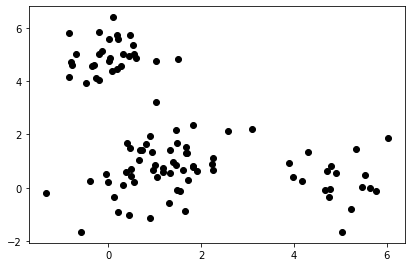

In [ ]:
plt.figure()
d = np.vstack(data)
plt.plot(d[:,0], d[:,1],'ko')
plt.rcParams.update({'font.size':16})
plt.tight_layout()

In [ ]:
np.random.seed(4)

# Initialization of parameters
chosen = np.random.choice(len(data), 3, replace=False)
initial_means = [data[x] for x in chosen]
initial_covs = [np.cov(data, rowvar=0)] * 3
initial_weights = [1/3.] * 3

# Run EM 
results = EM(data, initial_means, initial_covs, initial_weights)

Iteration 0
Iteration 5
Iteration 10
Iteration 15
Iteration 20
Iteration 22


In [ ]:
def bivariate_normal(X, Y, sigmax=1.0, sigmay=1.0,
                 mux=0.0, muy=0.0, sigmaxy=0.0):

    Xmu = X-mux
    Ymu = Y-muy

    rho = sigmaxy/(sigmax*sigmay)
    z = Xmu**2/sigmax**2 + Ymu**2/sigmay**2 - 2*rho*Xmu*Ymu/(sigmax*sigmay)
    denom = 2*np.pi*sigmax*sigmay*np.sqrt(1-rho**2)
    return np.exp(-z/(2*(1-rho**2))) / denom

In [ ]:
import matplotlib.mlab as mlab
def plot_contours(data, means, covs, title):
    plt.figure()
    plt.plot([x[0] for x in data], [y[1] for y in data],'ko') # data

    delta = 0.025
    k = len(means)
    x = np.arange(-2.0, 7.0, delta)
    y = np.arange(-2.0, 7.0, delta)
    X, Y = np.meshgrid(x, y)
    col = ['green', 'red', 'indigo']
    for i in range(k):
        mean = means[i]
        cov = covs[i]
        sigmax = np.sqrt(cov[0][0])
        sigmay = np.sqrt(cov[1][1])
        sigmaxy = cov[0][1]/(sigmax*sigmay)
        Z = bivariate_normal(X, Y, sigmax, sigmay, mean[0], mean[1], sigmaxy)
        plt.contour(X, Y, Z, colors = col[i])
        plt.title(title)
    plt.rcParams.update({'font.size':16})
    plt.tight_layout()

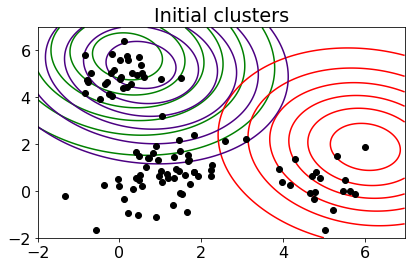

In [ ]:
# Parameters after initialization
plot_contours(data, initial_means, initial_covs, 'Initial clusters')

Iteration 0
Iteration 5
Iteration 10
Iteration 15
Iteration 20
Iteration 22


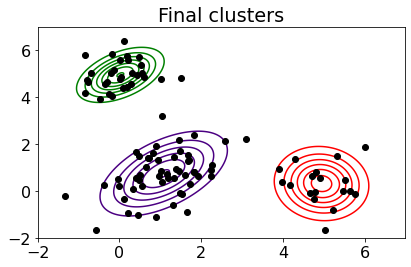

In [ ]:
# Parameters after running EM to convergence
results = EM(data, initial_means, initial_covs, initial_weights)
plot_contours(data, results['means'], results['covs'], 'Final clusters')

## Log-Likelihood

In [ ]:
results = EM(data, initial_means, initial_covs, initial_weights)


loglikelihoods = results['loglik']

Iteration 0
Iteration 5
Iteration 10
Iteration 15
Iteration 20
Iteration 22


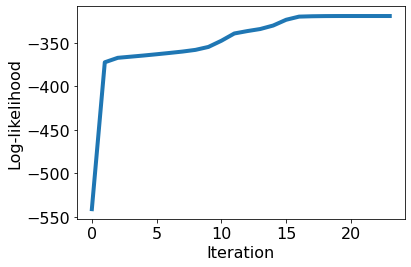

In [ ]:
plt.plot(range(len(loglikelihoods)), loglikelihoods, linewidth=4)
plt.xlabel('Iteration')
plt.ylabel('Log-likelihood')
plt.rcParams.update({'font.size':16})
plt.tight_layout()